In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [45]:
########################################## PD logic

books = pd.read_csv('books.csv')

### reserach
dup_counts = books.groupby('catalog_number')['book_id'].count()
dup_counts[dup_counts > 1]

### 1 see duplications
dup = books[books['catalog_number'].duplicated(keep=False)].copy()
dup

### 2 count not-null + sort by best first
dup['non_nan_count'] = dup.notna().sum(axis=1)
dup.sort_values(['catalog_number', 'non_nan_count'], ascending=[True, False], inplace=True)
dup

### 3 
kept = dup.drop_duplicates(subset=['catalog_number'], keep='first')
removed = dup[~dup['book_id'].isin(kept['book_id'])]
removed

### 4 remove dup from books
after_remove = books[~books['book_id'].isin(removed['book_id'])]
after_remove

# verify no more dup in after_remove
dup_counts = after_remove.groupby('catalog_number')['book_id'].count()
dup_counts[dup_counts > 1]  # empty 

### 5 actually remove all duplicates from original df
# books = books[~books['book_id'].isin(removed['book_id'])]  # 16 in [3, 5, 8, 16, 20]

books_sales = pd.read_csv('books_sales.csv')
books_sales

merged = removed.merge(kept, how='inner', on='catalog_number', suffixes=('_removed', '_kept'))
merged
result_map = dict(zip(merged['book_id_removed'], merged['book_id_kept']))

display(books_sales['book_id'].isin(removed['book_id']).sum())

books_sales['book_id'] = books_sales['book_id'].replace(result_map)

# check how many remove still exist
books_sales['book_id'].isin(removed['book_id']).sum()  # should be 0 


15

0

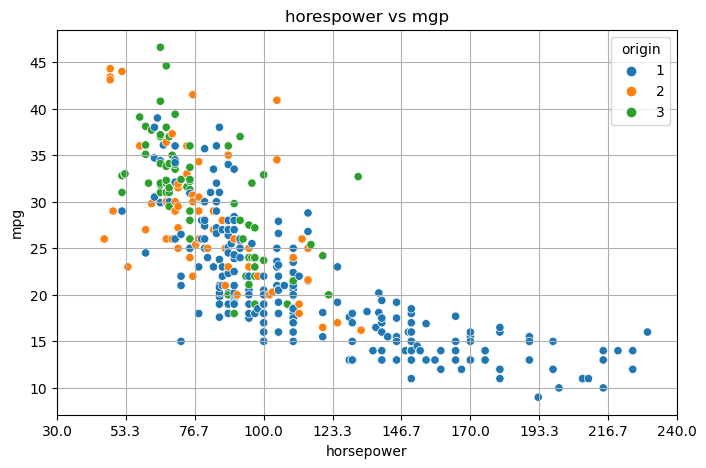

In [76]:
########################################## sns
'''
הנמצא ב- https://github.com/pythonai250824/exam_prep/blob/main/mpg.csv

תרגילים: 
1.	צור תרשים פיזור (scatter plot) בין עמודת horsepower לעמודת mpg
'''

mpg = pd.read_csv('mpg.csv')
mpg

########### 1
mpg['horsepower'] = pd.to_numeric(mpg['horsepower'], errors='coerce')
mpg['horsepower'].fillna(mpg['horsepower'].mean(), inplace=True)
mpg = mpg.sort_values(by='horsepower')

plt.figure(figsize=(8, 5))
sns.scatterplot(data=mpg, x='horsepower', y='mpg', hue='origin', palette='tab10')
plt.title('horespower vs mgp')
plt.xticks(np.linspace(30, 240, 10))
plt.grid(True)
plt.show()


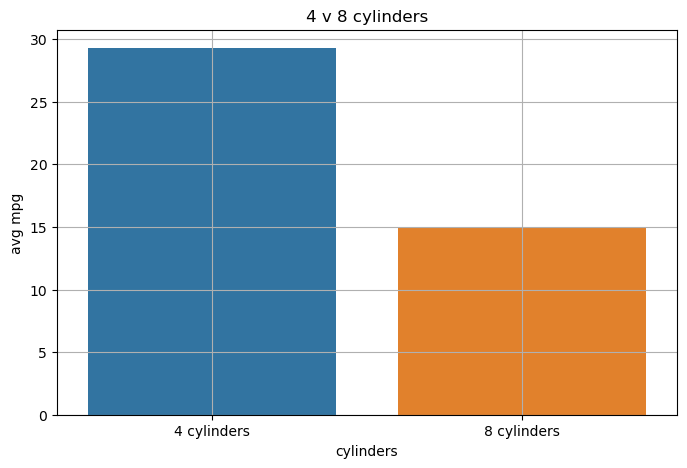

In [87]:
########################################## sns
'''
הנמצא ב- https://github.com/pythonai250824/exam_prep/blob/main/mpg.csv

תרגילים: 
2.	בדוק אם רכבים עם 4 צילינדרים צורכים פחות דלק מרכבים עם 8 צילינדרים 

(באמצעות עמודת mpg), הצג זאת באמצעות תרשים עמודות (bar chart)
'''

mpg = pd.read_csv('mpg.csv')
mpg

########### 2
cyl_4 = mpg[mpg['cylinders'] == 4]['mpg'].mean()
cyl_8 = mpg[mpg['cylinders'] == 8]['mpg'].mean()

plt.figure(figsize=(8, 5))

# warning
df = pd.DataFrame({
    'cylinders': ['4 cylinders', '8 cylinders'],
    'avg mpg': [cyl_4, cyl_8]
})
sns.barplot(data=df, x='cylinders', y='avg mpg')
plt.title('4 v 8 cylinders')
plt.grid(True)
plt.show()


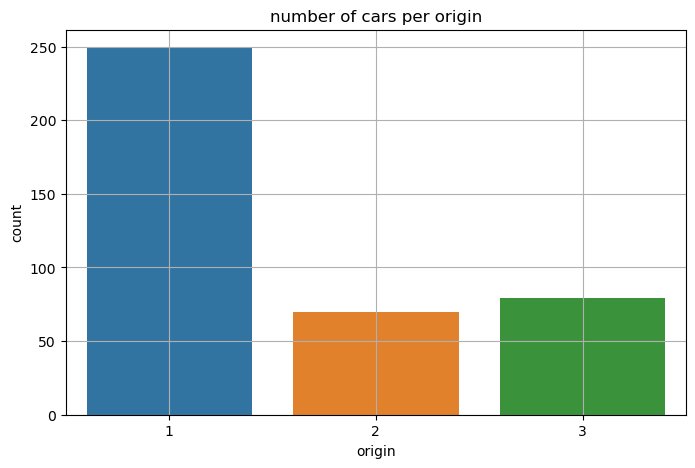

In [91]:
########################################## sns
'''
הנמצא ב- https://github.com/pythonai250824/exam_prep/blob/main/mpg.csv

תרגילים: 
3.	צור תרשים ספירה (count plot) לעמודת origin כדי לבדוק מאיזו מדינה יש הכי הרבה רכבים 

בקובץ
'''

mpg = pd.read_csv('mpg.csv')
mpg

########### 3
plt.figure(figsize=(8, 5))
sns.countplot(data=mpg, x='origin')
plt.title('number of cars per origin')
plt.grid(True)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


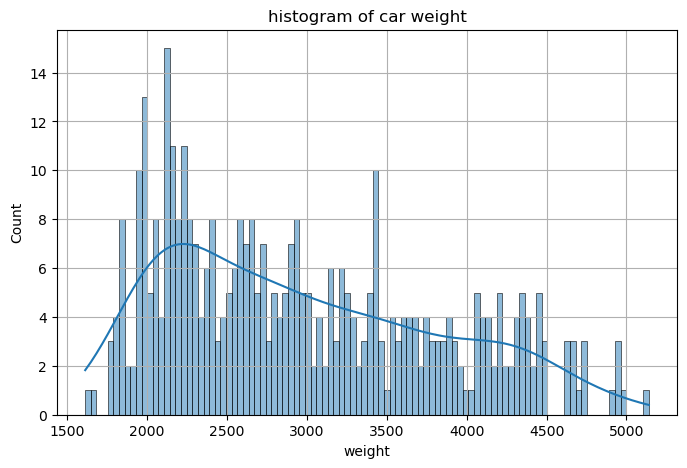

In [109]:
########################################## sns
'''
הנמצא ב- https://github.com/pythonai250824/exam_prep/blob/main/mpg.csv

4.	צור היסטוגרמה (histogram) לעמודת weight כדי להציג את התפלגות המשקל של הרכבים
'''

mpg = pd.read_csv('mpg.csv')
mpg

########### 4

pd.option_context('mode.use_inf_as_na', True)

plt.figure(figsize=(8, 5))
sns.histplot(data=mpg, x='weight', bins=100, kde=True)
plt.title('histogram of car weight')
plt.grid(True)
plt.show()


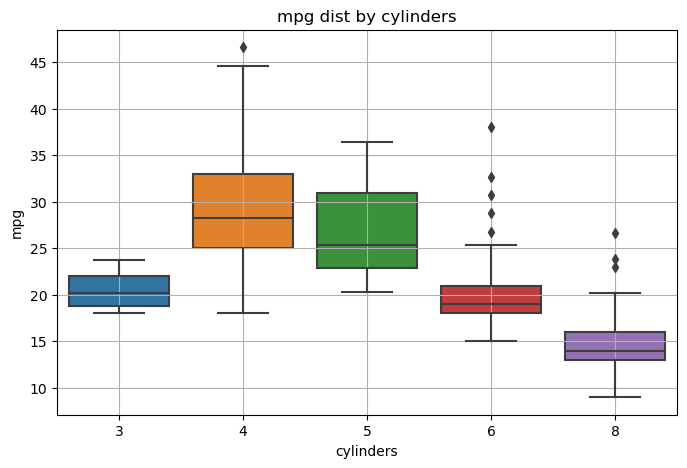

In [108]:
########################################## sns
'''
הנמצא ב- https://github.com/pythonai250824/exam_prep/blob/main/mpg.csv

5.	צור box plot להשוואת ערכי mpg לפי מספר הצילינדרים (cylinders)
'''

mpg = pd.read_csv('mpg.csv')
mpg

########### 3

pd.option_context('mode.use_inf_as_na', True)

plt.figure(figsize=(8, 5))
sns.boxplot(data=mpg, x='cylinders', y='mpg')
plt.title('mpg dist by cylinders')
plt.grid(True)
plt.show()
